In [ ]:
## environment and package setup
! python virtualenv -p python3 venv
# Install required packages
! pip install pandas numpy matplotlib seaborn scikit-learn nltk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Ensure NLTK resources are downloaded to the correct location
nltk.data.path.append('nltk_data')  # Update this path as needed
nltk.download('punkt', download_dir='nltk_data')
nltk.download('stopwords', download_dir='nltk_data')

[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load the data

In [4]:
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"Dataset loaded successfully with shape: {data.shape}")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

file_path = "answers.csv"
df = load_data(file_path)

Dataset loaded successfully with shape: (2442, 4)


In [5]:
df.head()

,id,answer,score,correct
0,1.1,High risk problems are address in the prototyp...,3.5,0.0
1,1.1,To simulate portions of the desired final prod...,5.0,1.0
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0
4,1.1,It is used to let the users have a first idea ...,3.0,0.0


# Visualizing the data

In [6]:
def explore_data(data):
    """
    Perform initial data exploration
    """
    if data is not None:
        print("\nDataset Info:")
        print(data.info())

        print("\nSample of the data:")
        print(data.head())

        print("\nBasic statistics:")
        print(data.describe())

        print("\nNull values:")
        print(data.isnull().sum())

        print("\nDuplicate rows:")
        print(data.duplicated().sum())

        return True
    return False


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data(data):
    # Preprocess data: Add derived metrics
    data['answer_length'] = data['answer'].str.len()  # Length of the answer in characters
    data['word_count'] = data['answer'].str.split().str.len()  # Word count

    # Create visualizations
    plt.figure(figsize=(15, 12))

    # 1. Distribution of Answer Lengths
    plt.subplot(2, 2, 1)
    sns.histplot(data['answer_length'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Answer Lengths')
    plt.xlabel('Answer Length (characters)')
    plt.ylabel('Frequency')

    # 2. Score Distribution
    plt.subplot(2, 2, 2)
    sns.histplot(data['score'], bins=10, kde=True, color='green')
    plt.title('Distribution of Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # 3. Box Plot of Scores by Correctness
    plt.subplot(2, 2, 3)
    sns.boxplot(data=data, x='correct', y='score', palette='Set2')
    plt.title('Scores by Correctness')
    plt.xlabel('Correct (0 = Incorrect, 1 = Correct)')
    plt.ylabel('Score')

    # 4. Word Count Distribution
    plt.subplot(2, 2, 4)
    sns.histplot(data['word_count'], bins=30, kde=True, color='purple')
    plt.title('Distribution of Word Counts')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [8]:
explore_data(df)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2442 non-null   float64
 1   answer   2442 non-null   object 
 2   score    2442 non-null   float64
 3   correct  2442 non-null   float64
dtypes: float64(3), object(1)
memory usage: 76.4+ KB
None

Sample of the data:
    id                                             answer  score  correct
0  1.1  High risk problems are address in the prototyp...    3.5      0.0
1  1.1  To simulate portions of the desired final prod...    5.0      1.0
2  1.1  A prototype program simulates the behaviors of...    4.0      1.0
3  1.1  Defined in the Specification phase a prototype...    5.0      1.0
4  1.1  It is used to let the users have a first idea ...    3.0      0.0

Basic statistics:
                id        score      correct
count  2442.000000  2442.000000  2442.000000
mean      7.202211 

True

/Users/mahshid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahshid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahshid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


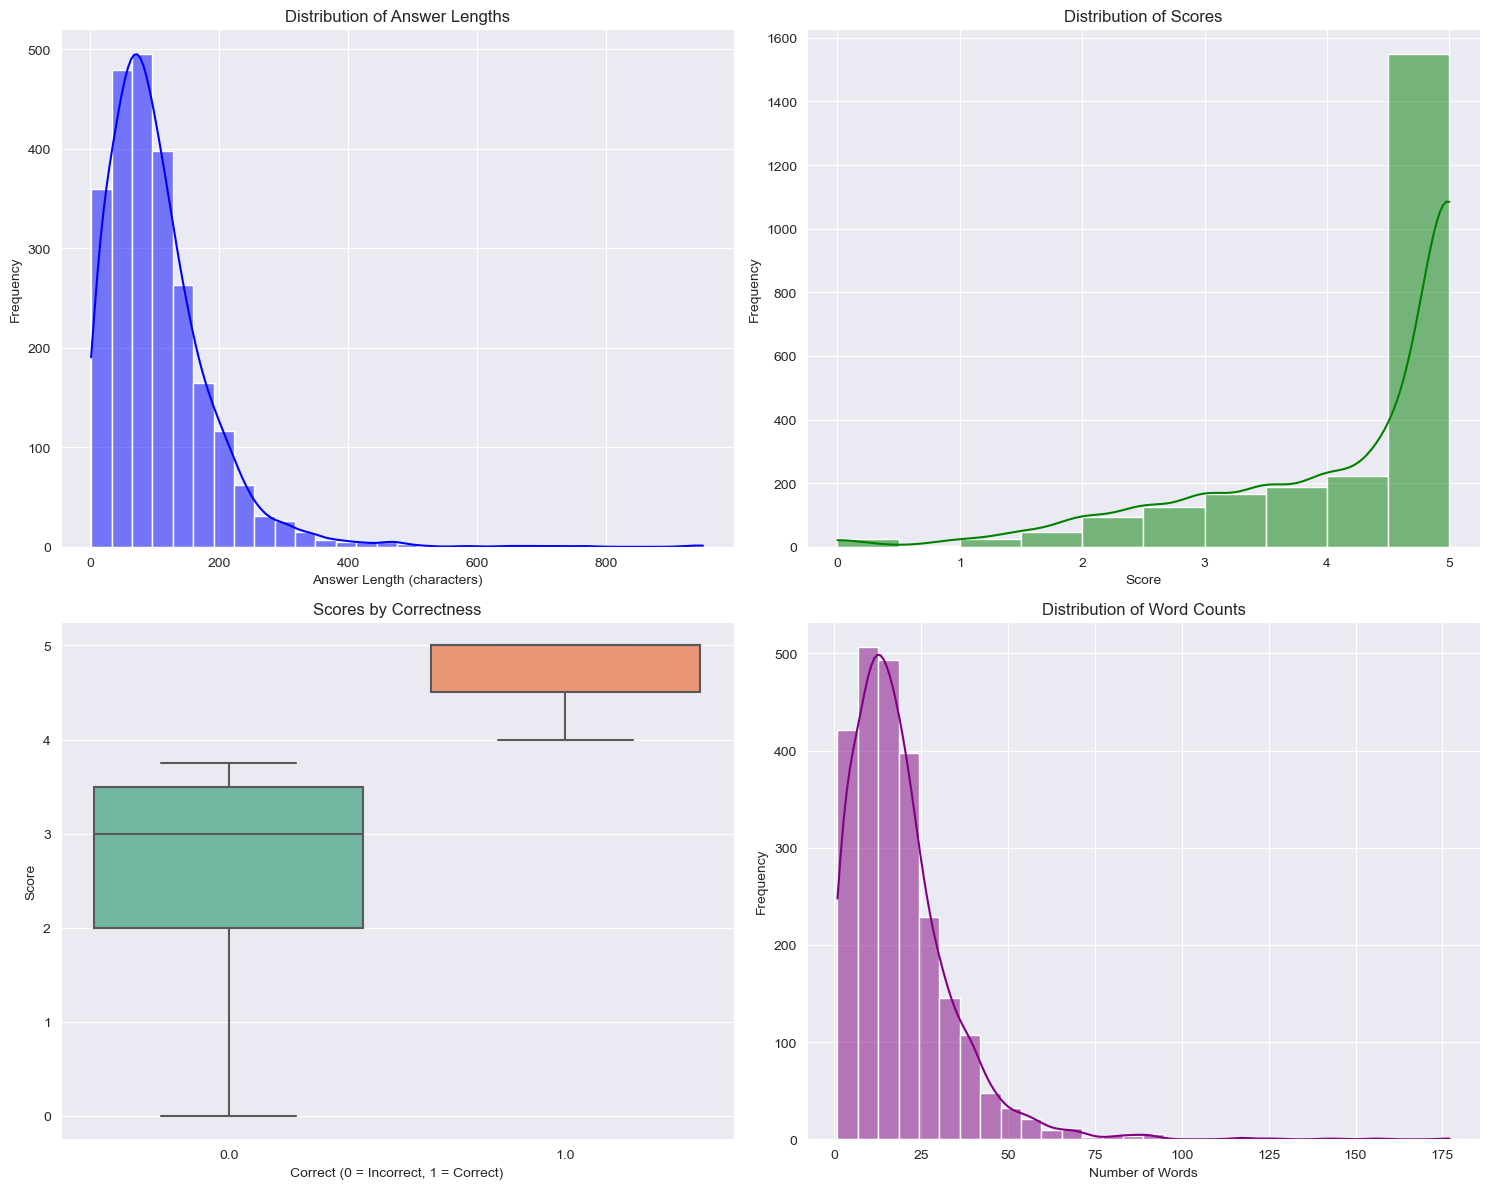

In [11]:
visualize_data(df)

# Preprocessing the text data

In [ ]:
def preprocess_text(text, remove_stopwords=True, min_length=2):
    stop_words = set(stopwords.words('english')) if remove_stopwords else set()
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) >= min_length]
    return ' '.join(tokens)

In [ ]:
def preprocess_dataset(texts, remove_stopwords=True, min_length=2):
    return [preprocess_text(text, remove_stopwords, min_length) for text in texts]

In [ ]:
pre_txt = preprocess_dataset(df["answer"])

In [ ]:
pre_txt

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def create_vectorizer(vectorizer_type='bow', max_features=5000):
    """
    Initialize and return the vectorizer based on type.

    Parameters:
    - vectorizer_type: str, 'bow' for Bag of Words or 'tfidf' for TF-IDF
    - max_features: int, maximum number of features for the vectorizer

    Returns:
    - vectorizer: Initialized vectorizer object
    """
    if vectorizer_type == 'bow':
        return CountVectorizer(max_features=max_features)
    elif vectorizer_type == 'tfidf':
        return TfidfVectorizer(max_features=max_features)
    else:
        raise ValueError("Invalid vectorizer_type. Choose 'bow' or 'tfidf'.")

def transform_texts(texts, vectorizer, fit=True):
    """
    Transform texts to feature vectors using the given vectorizer.

    Parameters:
    - texts: list of str, input texts to be transformed
    - vectorizer: CountVectorizer or TfidfVectorizer object
    - fit: bool, whether to fit the vectorizer to the data or only transform

    Returns:
    - transformed_texts: sparse matrix of shape (n_samples, n_features)
    """
    if fit:
        return vectorizer.fit_transform(texts)
    return vectorizer.transform(texts)





In [ ]:
X = transform_texts(pre_txt, create_vectorizer())

In [ ]:
X